# The Multilayer Perceptron Learning Algorithm

Tingting Yang

INDE 577 - Data Science and Machine Learning

## Introduction

The perceptron is a machine learning algorithm designed for two-class (binary) classification tasks, first introduced by Frank Rosenblatt back in the 1950s. The idea of the perceptron is originated from the real neurons in biology, where only a signal larger than threshold could stimulate the neuron and the signal would then be tuned. It is considered as one of the simplest types of neural networks, which consists of a single neuron/node. 

In the machine learning practice, the input values are aggregated with weights (weighted sum) followed by nonlinear activation (e.g., using sigmoid or ReLu), and the sign of the output value would be the prediction (binary). Usually, the model is then trained based on a loss function focusing on the prediction errors, with methods such as stochastic gradient descent.
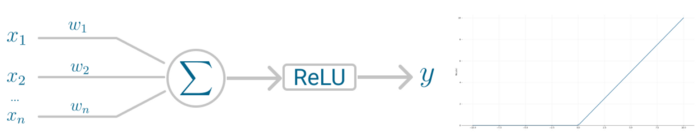

More details are discussed in my GitHub page for perceptron: https://github.com/cissyyang1014/DataScience_and_MachineLearning/tree/main/SupervisedLearning/Perceptron


One drawback of the perceptron algorithm is that, similar to other linear algorithms, it cannot solve nonlinear problems. One classical example is the 'XOR' problem. Let's say points at (0,0) and (1,1) belong to one class, and (0,1), (1,0) being the other, as is shown here
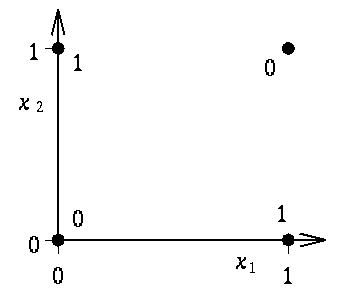

Then obviously, there is no linear classifier that could do this classification on the original coordinates.
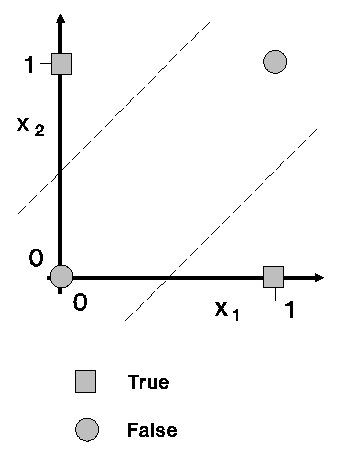

Although hard for perceptron, this kind of problems are quite simple for the real human brain, because we have the capability to deal with nonlinear problems. How is this achieved? There are connections between our neurons! The information gathered and processed by one neuron could be passed to another if their certein conpartments (axons and dendrites) are close enough. Moreover, one neuron can be connected to more than one upstream and downstream neurons, forming a large network.
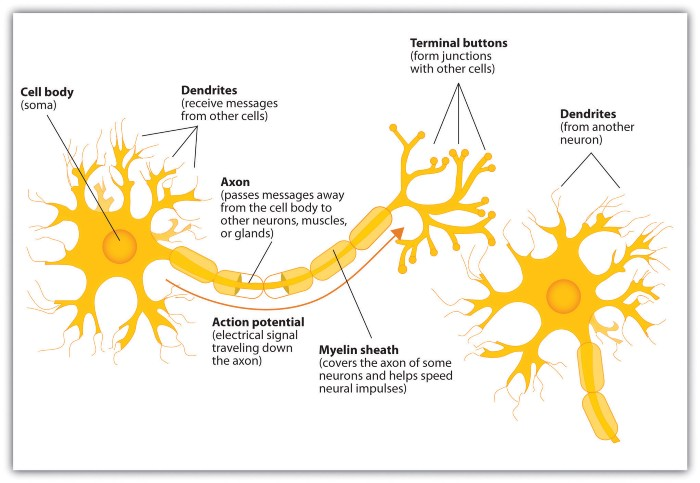

Following this idea, we could also 'connect' our 'neurons' in the perceptron to one another. That is how the multilayer perceptron (MLP) algorithm is designed. Different from the perceptron, there are more than one layers of neurons. To be more specific, there could be one or more layers between the input and output layer, namely the 'hidden layer'. Each nodes in the input layer can be connected to each nodes in the hidden layer, and pass the input value with a certain weight (similar rules as perceptron). Each nodes in the hidden layer would then do the calculation based on all the inputs, including a nonlinear activation. The result will be further pass on the next hidden layer with the same rule, until it gets to the output layer.
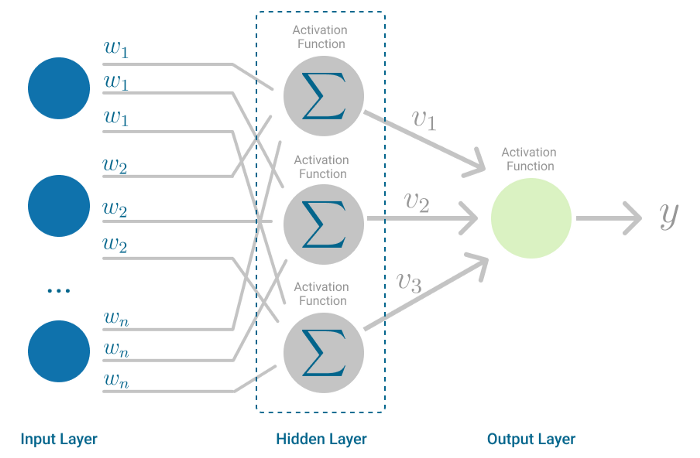


With more than one layers of nonlinear activation, the MLP algorithm is able to deal with nonlinear problems. Back to the XOR problem, we can use a fairly simple MLP model to solve it: 
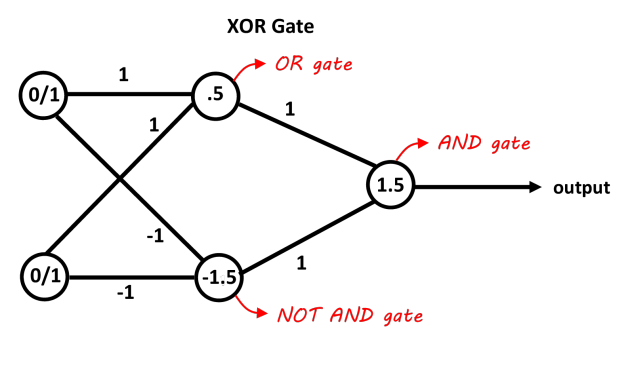
The input data is shown in left two nodes, and each would be 0 or 1 according to the XOR problem. The input value will then be weighted as shown in the edges. The activation threshold in the input layer is shown within the nodes (0.5 and -1.5). The activation rule here is that if the weighted sum is higher than the threshold, return 1, and otherwise return 0. The outputs of the input layer will then be weighted (shown in edge) and passed to the hidden layer, with threshold being 1.5. The activation rule is similar: if the weighted sum is higher than the threshold, return 1, and otherwise return 0. These outputs could then be directly used as the prediction output.

We can do the simple math:

The (0,0) will result in (0,1) in the hidden layer, and the final output will be 0.

The (1,1) will result in (1,0) in the hidden layer, and the final output will be 0.

The (0,1) will result in (1,1) in the hidden layer, and the final output will be 1.

The (1,0) will result in (1,1) in the hidden layer, and the final output will be 1.

Job done!

This is a simple demonstration showing that by simply adding a layer, we are able to solve nonlinear problems elegantly. Below we will describe a more general MLP training process.

### The Multilayer Perceptron Learning Algorithm

#### The goal of learning
We know that the perceptron involves 4 components:

* Input values
* Weights and bias
* Weighted sum (net sum)
* Activation function

This is exactly the same for MLP, while the weights and bias are the target for learning. In other words, we want to know which weights and biases can lead to the predicted output best fit the true label/value. The only difference is that the weights and bias should be learned more than one layer.

#### The Activation Function

The activation function is used to convert perceptron output. There are two activation functions often used in MLP, sigmoid and ReLU. 

In our algorithm, I will mainly use **sigmoid** function.

$$\sigma(z)=\frac {1}{1+e^{-z}}$$

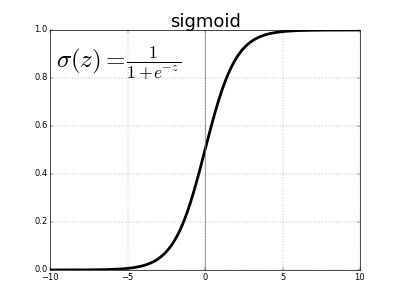

Define $L$ is the number of layers, for $l=1,...,L-1$, the preactivation phase is
$$z^l=w^l a^{l-1}+b^l$$

The postactivation phase is
$$a^l=\sigma(z^l)$$
and $a^0=x$.

Another commonly used activation function is **ReLU**, Rectified Linear Units. 

$$R(z)= max(0,z)$$

The function returns $0$ when the input is negative, and returns the input value when the input is positive.

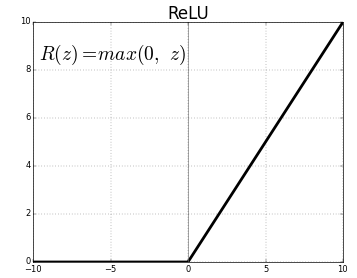



#### The Loss Function

The loss function is a function related to the differences between the truth and the prediction, and serves as a clue so that we know how to update the weights and biases, to minimize the differences, or loss. The total loss of the model would be the sum of the loss on each input data.

In our algorithm, we use the Mean Square Error:

$$C(w,b;x,y)=\frac{1}{2} \sum_{i=1}^n(a_i^{l-1}-y_i)^2$$

#### Output Error

The output error is

$$\delta^{l-1}=\triangledown_{a^{l-1}}C \otimes \sigma'(z^{l-1})$$

#### Neuron Error

According to the output error, for $l=L-2,...,1$, the neuron error is

$$\delta^{l}=\left ( (w^{l+1})^T a^{l+1} \right ) \otimes \sigma'(z^{l})$$

#### Stochastic Gradient Descent (SGD)

To optimize the parameters, again, we use the idea of gradient descent algorithm. In practice, usually a modification of the gradiant descent is used, especially when the dataset is big. In Stochastic Gradient Descent, in each iteration, one data point from the whole dataset is selected randomly and calculated the gradient. Because of the randomness in the SGD, it usually takes a higher number of iterations to reach the minimun.

In each epoch of SGD, the working flow is: 1) take an example; 2) feed to the neural network; 3) calculate the gradient and update the weights; 4) repeat 1-3 until the loss converges or reach the maximum number of iteration. 

Combine with our algorithm, for $l=1,...,L-1$, to update the weights,

$$w^l = w^l - \alpha \delta^l (a^{l-1})^T$$
where $\alpha$ is the learning rate.

#### Mini-Batch Gradient Descent

Mini-batch gradient descent is the most common implementation of gradient descent in deep learning or neural network. Instead of using the whole dataset for computation, in mini-batch gradient descent, the training dataset is split into small batches (mini-batches), and these mini-batches are used to calculate and update the gradient. Mini-batch gradient descent can greatly speed up the algorithm.

In one epoch of the mini-batch gradient descent, the working flow is: 1) pick a mini-batch; 2) feed to the neural network; 3) calculate the mean gradient and update the weights; 4) repeat 1-3 for the generated mini-batches.

In our algorithm, let $M$ to be the batch size, choose $X_1,...,X_M$ as a batch, we update weights and bias as follow:

$$w^l = w^l - \frac {\alpha}{M} \sum_{i=1}^M \delta^{X_i,l} (a^{X_i,l-1})^T$$

$$b^l = b^l - \frac {\alpha}{M} \sum_{i=1}^M \delta^{X_i,l}$$

---

## Implement

In the following of this notebook, I will build a multilayer perceptron with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size ($60$ nodes per layer), and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

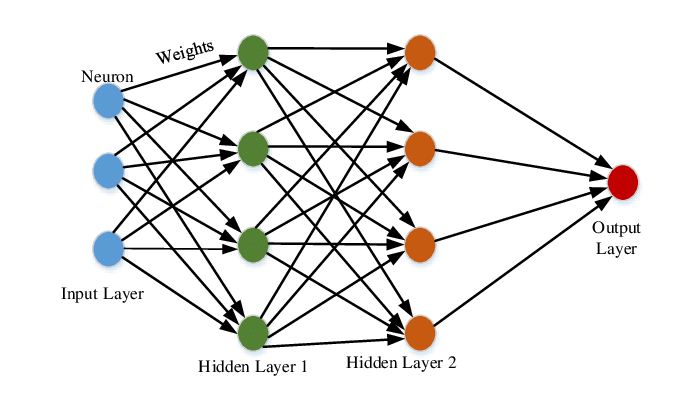

I will use the sigmoid function as the activation function first. For the loss function, the Mean Squared Error will be used.

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. 

I will build the algorithm with the **stochastic gradient descent** strategy and the **mini-batch gradient descent** strategy, and simply compare the performance.

At the end of this notebook, I will also **increase the number of the nodes in the hidden layers** to see whether it can improve the performance of the algorithm. Also, I will **add another activation function, ReLU**, and compare the performance of the algorithms with different activation functions.

### About the Fashion MNIST Dataset

The [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) dataset ia an alternative dataset to the MNIST. It consists of $70000$ $28\times 28$ grayscale images of $10$ fashion categories, $60000$ of which are typically used as labeled training examples, while the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.

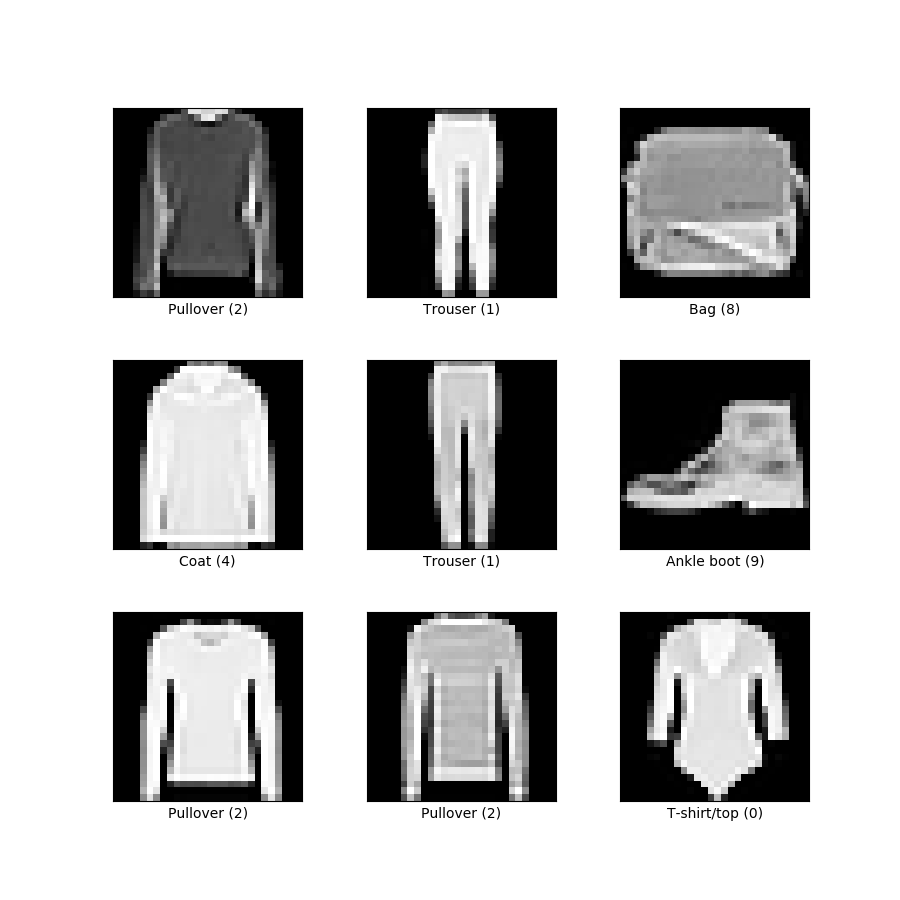

Like the images above, each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Similar to the MNIST dataset, each image on the Fashion MNIST dataset is stored as a matrix:

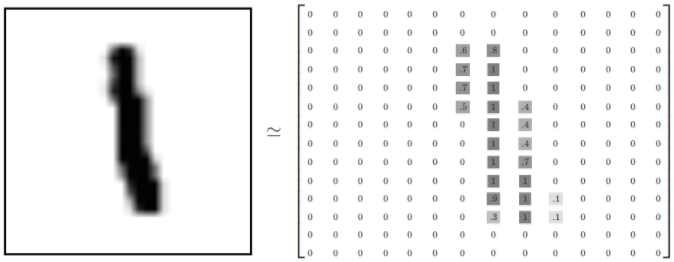

### Goal

To classify fashion categories using the Multilayer Perceptron Learning algorithm based on the Fashion MNIST dataset.

* Build the algorithm with the stochastic gradient descent strategy and the mini-batch gradient descent strategy, and simply compare the performance.

* Increase the number of the nodes in the hidden layers to see whether it can improve the performance of the algorithm.

* Add ReLU as another activation function, and compare the performance of the algorithms with different activation functions.


### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [tensorflow](https://www.tensorflow.org/)

To load the Fashion MNIST data, we also need to import [keras.dataset](https://keras.io/api/datasets/).

In [1]:
# Import the necessaty libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration and Data Wrangling

In [2]:
# Load the Fashion MNIST data
from keras.datasets import fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Check the shape of the training set
train_X.shape

(60000, 28, 28)

In [4]:
# Check the shape of the first matrix in the training set
train_X[0].shape

(28, 28)

In [5]:
# Check the shape of the test set
test_X.shape

(10000, 28, 28)

The training set has $60000$ pictures with $28 \times 28$ pixel. The test set has $10000$ pictures with the same $28 \times 28$ pixel. 

Let's check the first data point in the training set.

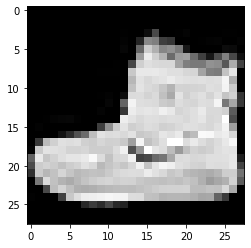

In [6]:
# Show the first matrix in the training set
plt.imshow(train_X[0], cmap="gray")

In [7]:
# Check the first label of the training set
train_y[0]

9

The matrix and the label match (9: Ankle boot).

So far, we have an overall impression about the MNIST dataset.

Then let's check the range of the grey scale ( 𝑥 ) in the training matrics. If the range is big, we may need to scale it.

In [8]:
np.max(train_X)

255

In [9]:
np.min(train_X)

0

In [10]:
np.max(test_X)

255

In [11]:
np.min(test_X)

0

The the range of the grey scale ($x$) is $(0, 255)$, and thus, we need to scale it down by dividing the maximun value.

In [12]:
# Scale down X
train_X = train_X/255
test_X = test_X/255

Then we need to reshape the input matrics ($X$) and output matrics ($y$) to a desire pattern that can fit our algorithm.

First, for the input matrics ($X$), we need to flatten the $28 \times 28$ matrix, and reshape it to a $784 \times 1$ vector.

In [13]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

Second, for the output matrics ($y$), it is a single number, and we need to do the One Hot Encoding and represent it using a $10 \times 1$ vector. The idea is just the same as we did for the digits. For example, 

$$y=9 \overset{\text {One Hot encode}}{\rightarrow} y =\begin{bmatrix}
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
1
\end{bmatrix}$$

In [14]:
# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

In [15]:
# Our data will be stored as a list of tuples
train_data = [p for p in zip(X, Y)]

So far, the "train_data" would have one column with the flattened $X$ vectors and the one column with the One Hot encoded label vectors. We can pick the first data point and print the One Hot encoded label and the original true value to check the transformation.

In [16]:
p = train_data[0]
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
9


The transformation is correct! Then we can do the same thing on the test set.

In [17]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

---

### Build the Algorithm

To build the algorithm, there are several functions need to be defined.

#### Activation Function
We choose the sigmoid function as the activation function, 
$$\sigma(z)=\frac {1}{1+e^{-z}}$$
Derivation of the sigmoid function is 
$$\sigma'(z)=\frac {e^{-z}}{(1+e^{-z})^2}=\frac {1}{(1+e^{-z})}\frac {e^{-z}}{(1+e^{-z})}=\frac {1}{1+e^{-z}} \times \left ( 1- \frac {1}{1+e^{-z}}  \right )$$


In [18]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))#### Loss Function

#### Loss Function
we use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

In [19]:
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

#### The Function to Initialize the Weights and Bias

For our algorithm, we set up the number of nodes in the four layers to be $748$, $60$, $60$, and $10$, repectively. And thus, the dimemsions of the weights are ($60$, $784$), ($60$, $60$), ($10$, $60$), repectively, and the dimensions of the bias are ($60$, $1$), ($60$, $1$), ($10$, $1$), repectively. 

When intializing, scaling initializer is applied, which can speed up the algorithm. 

In [20]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]  #add weight_0, to match the shape
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])  #Scaling initializer to scale the shape
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

Let's test!

In [21]:
W, B = initialize_weights()

In [22]:
x, y = train_data[0]

First layer:

In [23]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [24]:
a1.shape

(60, 1)

The shape of the output of the first layer match the desire dimension.

Second layer:

In [25]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


The shape of the output of the second layer match the desire dimension.

And the third layer:

In [26]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


The shape of the output of the thired layer match the desire dimension.

These results suggest that the "innitialize_weights" function works well. And then, we can put the input and output of the layers together.

In [27]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

To check whether the loop works well, we can print the shape of the output of the layer before the last layer:

In [28]:
A[-1].shape

(10, 1)

The shape is correct! Let's move on!

#### Output Error

The output error is

$$\delta^{l-1}=\triangledown_{a^{l-1}}C \otimes \sigma'(z^{l-1})$$

In [29]:
# Measure the output error
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [30]:
deltas[L-1]

array([[ 0.04393003],
       [ 0.14535609],
       [ 0.14791452],
       [ 0.04708221],
       [ 0.13934248],
       [ 0.11360706],
       [ 0.14144958],
       [ 0.08405988],
       [ 0.13342248],
       [-0.06628045]])

#### Neuron Error

According to the output error, for $l=L-2,...,1$, the neuron error is

$$\delta^{l}=\left ( (w^{l+1})^T a^{l+1} \right ) \otimes \sigma'(z^{l})$$

In [31]:
# calculate the neuron error
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [32]:
deltas[1].shape

(60, 1)

In [33]:
deltas[2].shape

(60, 1)

In [34]:
deltas[3].shape

(10, 1)

The dimensions of the outputs of the layers are all correctly, suggesting that the codes for the output error and the neuron error work correctly.

The gradient descent will be used to optimize the algorithm.

In [35]:
# Set the learning rate
alpha = 0.04

In [36]:
# To update the weights and bias
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

#### Feedforward Process

In [37]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

#### Store the Neuron Errors

In [38]:
def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

#### Average of Mean Squared Error

This is to evaluate the overall performance for each step (epoch/mini-batch depends on settings).

In [39]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

---

### Implement the Algorithm

Before training, we first look at the initial cost and the performance.

In [40]:
# Calculate the initial cost
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.458687554503895


Predicted Value = 6
Actual Value = 5


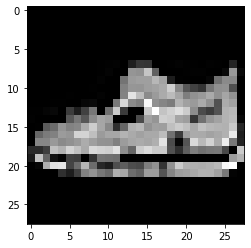

In [41]:
# Show the performance
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction is wrong. 

Next, we can train the model using Stochasitc Gradient Descent strategy.

#### Stochasitc Gradient Descent

First, we define a SGD function.

In [42]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

Let's train the model!

In [43]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 1.458687554503895
0 Cost = 0.12407582199613687
1 Cost = 0.11040800690398268
2 Cost = 0.1031131709568528


The costs of every epoch gradually decrease. The training process works well.

We can also take a look at one example.

Predicted Value = 8
Actual Value = 8


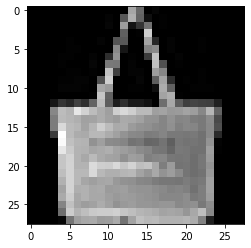

In [44]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction now is correct!

We can put all the functions together to make a class. In the meantime, we also define another strategy, **mini-batch gradient descent** to optimize the algorithm.


In [45]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

    
  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range(0, data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append(deltas)
                A_list.append(A)
                
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

Let's try our class!

We can also setup 60 nodes for both hidden layers.

In [50]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10])

To use the stochastic gradient descent strategy:

In [51]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.2874501472234352
2 Cost = 0.10130681586741724


To use the mini-batch gradient descent strategy:

In [52]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.10130681586741724
2 Cost = 0.09297521993064843


Compare these two strategy, the mini-batch gradient descent has a smaller cost than the stochastic gradient descent. 

Notably, the mini-batch gradient descent takes a longer time to compute.

---

### Increase the Number of Nodes in the Hidden Layers

Let's setup 100 nodes for both hidden layers!

In [49]:
net = MultilayerPerceptron(layers=[784, 100, 100, 10])

To use the stochastic gradient descent strategy:

In [47]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.0735791530633263
2 Cost = 0.10169127253855581


To use the mini-batch gradient descent strategy:

In [48]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.10169127253855581
2 Cost = 0.09255417086112587


The mini-batch gradient descent still has a smaller cost than the stochastic gradient descent. 

Increasing the number of nodes in the hidden layers does not greatly change the loss in this case.

---

### Add ReLU as Another Activation Function

The ReLU function is 
$$R(z)= max(0,z)$$

The derivation of the ReLU function is

$$R'(z)= \left\{\begin{matrix}
0, \text{ if }z < 0\\ 
1, \text{ if }z > 0
\end{matrix}\right.$$


In [57]:
def ReLU(z):
  return np.maximum(0, z)

def ReLU_prime(z):
    if z > 0:
        return 1.0
    else:
        return None 

In [63]:
ReLU(10)

10

In [64]:
ReLU_prime(10)

1.0

Then we can add the ReLU function and modify the "MultilayerPerceptron" class:
* Add another parameter, "activation_type"
* Define "activation" function, which returns the value of the specified activation function
* Define "activation_prime" function, which returns the value of the derivation of the specified activation function
* Modified other function to call the "activation" and "activation_prime" functions

In [113]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10], activation_type = 'sigmoid'):
    self.layers = layers
    self.activation_type = activation_type
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)
        
  def activation(self, z, type):
    if type == "sigmoid":
        return 1.0/(1.0+np.exp(-z))
    elif type == "ReLU":
        return np.maximum(0, z)
    else:
        return None

  def activation_prime(self, z, type):
    if type == "sigmoid":
        return sigmoid(z)*(1.0-sigmoid(z))
    elif type == "ReLU":
        return np.where(z > 0, 1.0, 0)
    else:
        return None
       
  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = self.activation(z, self.activation_type)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*self.activation_prime(Z[-1], self.activation_type)
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * self.activation_prime(Z[l], self.activation_type)

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

    
  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range(0, data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append(deltas)
                A_list.append(A)
                
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

To use ReLU as the activation function:

In [114]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10], activation_type = 'ReLU')

In [115]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.231503952740792
2 Cost = 0.4230965982040294


In [116]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.4230965982040294
2 Cost = 0.3780767066902183


When using ReLU as the activation function, the mini-batch gradient descent also has a smaller cost than the stochastic gradient descent.

Compare the results of the sigmoid function, ReLU gains a larger, suggesting that the sigmoid function is better than ReLU in this case.

---

## Conclusion

The algorithm we build works well. 

To classify the fashion categories, the mini-batch gradient descent strategy performs better than the stochastic gradient descent strategy. 

Increaing the number of nodes in the hidden layer does not affect the performance of the algorithm in this case. 

In the meantime, sigmoid function is the better than ReLU to classify the fashion categories.